# Author: Bismillah Jan
## Evaluation of Classifier
* Using Different metrices (Accurac, Confusion Matrix, ROC etc)
* Using PIMA_Indian_diabetes dataset

In [1]:
import pandas as pd

In [2]:
col_names=['pregnant', 'glucose', 'bp', 'skin',  'insulin', 'bmi', 'pidegree', 'age', 'label']
pima=pd.read_csv("pima_indian_diabetes.csv", header=None, names=col_names )
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pidegree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_col=['pregnant','insulin','bmi', 'age']
X=pima[feature_col]
y=pima.label
X.head()

,pregnant,insulin,bmi,age
0,6,0,33.6,50
1,1,0,26.6,31
2,8,0,23.3,32
3,1,94,28.1,21
4,0,168,43.1,33


## Using train_test_split procedure
### Accuracy measure

In [20]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
xtr,xtest,ytr,ytest=train_test_split(X,y, test_size=0.3) 

### Logistic Regression

In [21]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression as lg
model=lg()
model.fit(xtr, ytr)
yPred=model.predict(xtest)
acc=metrics.accuracy_score(ytest, yPred)
model.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
print acc

0.662337662338


## Null accuracy
* what is the percentage of maximum class

In [23]:
null_acc= max(ytest.mean(), 1-ytest.mean())
print null_acc
print "True: ", ytest.values[0:25]
print "Pred: ", yPred[0:25]

0.679653679654
True:  [0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
Pred:  [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0]


# Confusion matrix

In [24]:
confusion=metrics.confusion_matrix(ytest, yPred)
print confusion

[[134  23]
 [ 55  19]]


In [25]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [26]:
Acc=(TP+TN)/float(TP+TN+FP+FN)
Miss_cl_rate= (FP+FN)/float(TP+TN+FP+FN)
TPR=TP/float(TP+FN)
TNR= TN/float(TN+FP)
FPR=FP/float(FP+TN)
FNR=FN/float(FN+TP)
Precession= TP/float(TP+FP)

print "TP:",TP , "  FP:",FP,  "  TN:",TN,  "  FN:",FN
print "Accuracy: ", Acc, "vs", acc               #where acc is calculated using metrics procedure
print "Mis-classification Rate: ", Miss_cl_rate  #  also equal to 1-Acc
print "TPR: ", TPR                 #metrics.recall_score(ytest, yPred)
print "TNR: ", TNR                 #specificity=1-FPR
print "FPR: ", FPR 
print "FNR: ", FNR                 #FNR=1-TPR
print "Precession: ", Precession                 #metrics.precision_score(ytest, yPred)

TP: 19   FP: 23   TN: 134   FN: 55
Accuracy:  0.662337662338 vs 0.662337662338
Mis-classification Rate:  0.337662337662
TPR:  0.256756756757
TNR:  0.853503184713
FPR:  0.146496815287
FNR:  0.743243243243
Precession:  0.452380952381


## ROC Curve

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

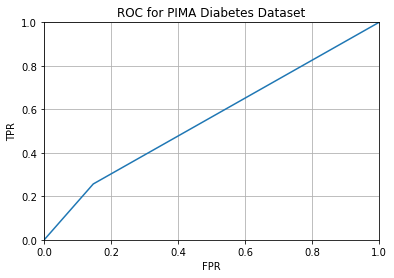

In [28]:
fpr, tpr, thresholds= metrics.roc_curve(ytest, yPred)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for PIMA Diabetes Dataset")
plt.grid(True)

In [29]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [30]:
evaluate_threshold(0.5)

('Sensitivity:', 0.25675675675675674)
('Specificity:', 0.85350318471337583)


In [33]:
print(metrics.roc_auc_score(ytest, yPred))

0.555129970735


In [35]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()

0.73782336182336183